In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
df = pd.read_csv('dataset/train.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [5]:
df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
!conda install -c conda-forge pandas-profiling

^C


In [19]:
df['gender'].value_counts()

0    139
1     76
Name: gender, dtype: int64

C:\Users\aksha\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

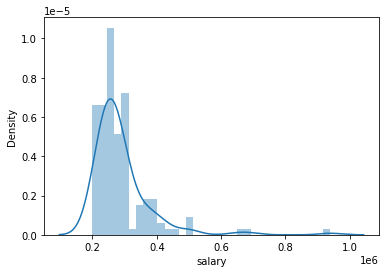

In [21]:
sns.distplot(df['salary'])

## Filling Missing Values in Salary with Mean

In [25]:
def fill_salary():
    mean_salary = df['salary'].mean()
    df['salary'].fillna(value=mean_salary, inplace=True)

In [26]:
fill_salary()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


## Now let's convert categorical data into numerical

In [29]:
df['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [38]:
df['ssc_b'].replace(to_replace=['Central','Others'],value=[1,0], inplace=True)

In [30]:
df['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [39]:
df['hsc_b'].replace(to_replace=['Central','Others'], value = [1,0], inplace=True)

In [31]:
df['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [41]:
df['hsc_s'].replace(to_replace=['Commerce','Science','Arts'], value=[0,1,2], inplace=True)

In [32]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [42]:
df['degree_t'].replace(to_replace=['Comm&Mgmt','Sci&Tech','Others'], value=[0,1,2], inplace=True)

In [33]:
df['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [43]:
df['workex'].replace(to_replace=['No','Yes'], value=[0,1], inplace=True)

In [34]:
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [44]:
df['specialisation'].replace(to_replace=['Mkt&Fin','Mkt&HR'], value=[0,1], inplace=True)

In [35]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [46]:
df['status'].replace(to_replace=['Placed','Not Placed'],value=[1,0], inplace=True)

In [47]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,0,91.00,0,0,58.00,1,0,55.0,1,58.80,1,270000.000000
1,2,0,79.33,1,78.33,0,1,77.48,1,1,86.5,0,66.28,1,200000.000000
2,3,0,65.00,1,68.00,1,2,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,0,56.00,1,52.00,1,1,52.00,1,0,66.0,1,59.43,0,288655.405405
4,5,0,85.80,1,73.60,1,0,73.30,0,0,96.8,0,55.50,1,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,0,82.00,0,0,77.60,0,0,91.0,0,74.49,1,400000.000000
211,212,0,58.00,0,60.00,0,1,72.00,1,0,74.0,0,53.62,1,275000.000000
212,213,0,67.00,0,67.00,0,0,73.00,0,1,59.0,0,69.72,1,295000.000000
213,214,1,74.00,0,66.00,0,0,58.00,0,0,70.0,1,60.23,1,204000.000000


In [48]:
df.to_csv('dataset/train_clean.csv',index=False)

<AxesSubplot:>

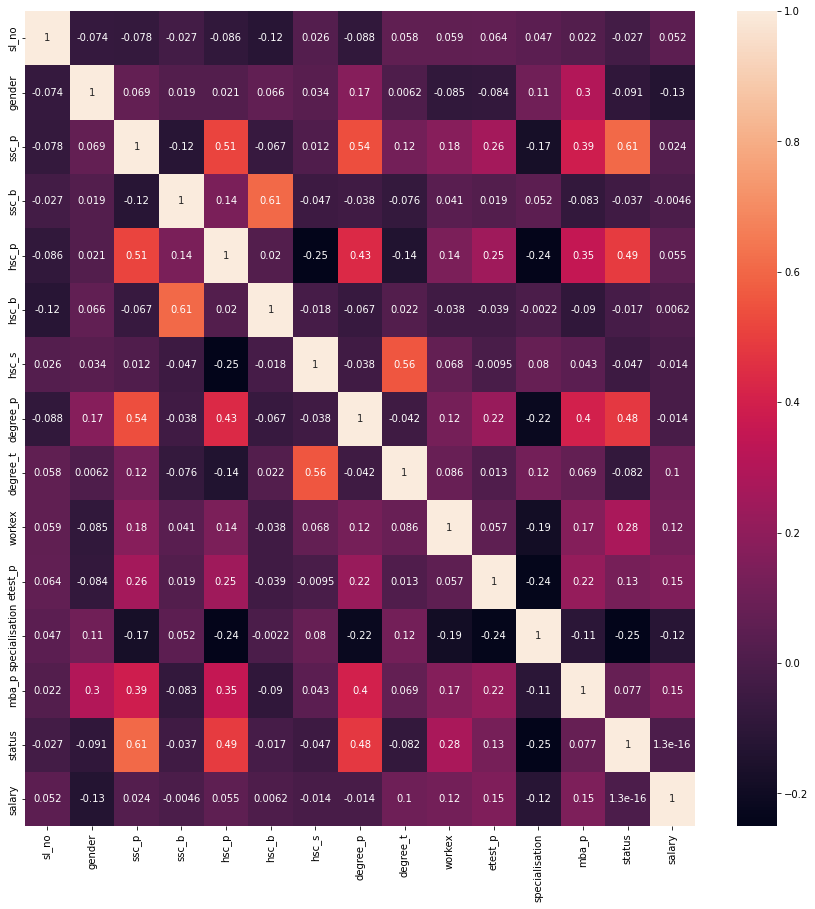

In [53]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X = df.drop(columns=['status'], axis=1)
y = df['status']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [60]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 14), (150,), (65, 14), (65,))

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [65]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
pickle.dump(scaler,open('scaling.pkl','wb'))

In [69]:
X_train

array([[ 0.68421728, -0.72843136, -1.69698067, ..., -0.85096294,
         0.07741824,  0.62192014],
       [-0.02305173, -0.72843136, -0.54746812, ..., -0.85096294,
        -0.62951764,  0.13428177],
       [-1.26470178, -0.72843136, -0.45167541, ..., -0.85096294,
        -1.81961114, -0.00401972],
       ...,
       [ 0.38559259,  1.37281295,  1.02736407, ..., -0.85096294,
         0.86572803, -0.47526619],
       [-0.19593971,  1.37281295,  0.36256264, ..., -0.85096294,
         1.18783311, -0.00401972],
       [ 0.54276348, -0.72843136, -1.40960253, ..., -0.85096294,
        -0.59391656, -0.00401972]])

In [70]:
X_test

array([[ 1.06142743e+00,  1.37281295e+00,  6.02044425e-01,
         8.86405260e-01,  2.96138362e+00, -8.39372060e-01,
        -8.71195751e-01,  1.75659786e+00, -6.47005585e-01,
         1.37281295e+00,  1.26006552e+00, -8.50962943e-01,
         1.48959471e+00,  4.40111751e+00],
       [ 1.17144705e+00,  1.37281295e+00, -9.99609726e-01,
        -1.12815215e+00, -2.09585235e-01, -8.39372060e-01,
        -8.71195751e-01, -8.61887395e-01, -6.47005585e-01,
        -7.28431359e-01, -9.02927952e-01,  1.17513930e+00,
        -8.02437212e-01, -4.01972170e-03],
       [-1.59476065e+00, -7.28431359e-01,  6.02044425e-01,
         8.86405260e-01,  1.29098739e+00,  1.19136679e+00,
        -8.71195751e-01,  8.02438738e-01, -6.47005585e-01,
        -7.28431359e-01,  1.43459672e+00, -8.50962943e-01,
        -1.24321258e-01, -7.06894420e-01],
       [-1.33071356e-01, -7.28431359e-01, -3.55882699e-01,
         8.86405260e-01,  6.41388849e-01,  1.19136679e+00,
        -8.71195751e-01,  2.57204952e-01, -6.

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model_log_reg = LogisticRegression()

In [73]:
model_log_reg.fit(X_train, y_train)

LogisticRegression()

In [74]:
model_log_reg.score(X_train, y_train)

0.8666666666666667

In [75]:
model_log_reg.score(X_test, y_test)

0.9076923076923077

In [76]:
y_pred = model_log_reg.predict(X_test)

In [77]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [80]:
np.array(y_test)

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

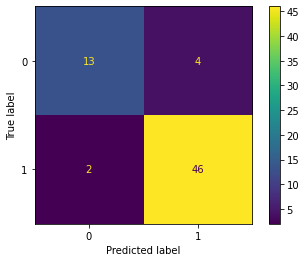

In [84]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
model_dt = DecisionTreeClassifier()

In [88]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
model_dt.score(X_train, y_train)

1.0

In [90]:
model_dt.score(X_test, y_test)

0.9538461538461539

In [91]:
y_pred = model_dt.predict(X_test)

In [92]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      dtype=int64)

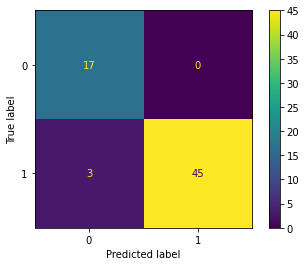

In [93]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
model_rf = RandomForestClassifier()

In [96]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
model_rf.score(X_train, y_train)

1.0

In [98]:
model_rf.score(X_test, y_test)

0.9692307692307692

In [99]:
y_pred = model_rf.predict(X_test)

In [100]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

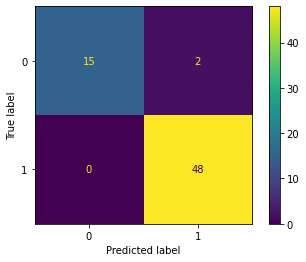

In [101]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()

In [102]:
X_test[0]

array([ 1.06142743,  1.37281295,  0.60204442,  0.88640526,  2.96138362,
       -0.83937206, -0.87119575,  1.75659786, -0.64700558,  1.37281295,
        1.26006552, -0.85096294,  1.48959471,  4.40111751])